# Pandas를 활용한 통계 기초 및 시각화

## Discrete Random Variables (이산 확률 변수)
이산 환율 변수는 셀 수 있는 수의 값만 취할 수 있는 확률 변수의 한 유형입니다. 이러한 값은 일반적으로 정수이지만 다른 셀 수 있는 값 집합일 수도 있습니다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(1)

#한글 폰트 사용
import platform
from matplotlib import font_manager
 
if platform.system() == "Darwin":  #Mac
    plt.rc('font', family='AppleGothic')
else:
    font_path = 'C:/Windows/Fonts/malgun.ttf' # For Windows 
    font_name = font_manager.FontProperties(fname=font_path).get_name()  
    plt.rc('font', family=font_name)                           

plt.rcParams['axes.unicode_minus'] = False  #한글사용시 마이너스 사인 깨짐 방지

### 주사위 게임

2개의 주사위를 굴린 결과를 모방하므로 다른 결과를 얻을 수 있지만 범위는 2에서 12 사이로 제한되어야 합니다.

In [2]:
# 주사위
die = pd.DataFrame([1, 2, 3, 4, 5, 6])
die

,0
0,1
1,2
2,3
3,4
4,5
5,6


두개의 주사위를 던진다 -> 1~6 숫자를 두번 복원 추출.

In [7]:
die.sample(2, replace=True)

,0
0,1
1,2


두개의 주사위 던지기 합계 값 모사합니다.

In [11]:
sum_two= die.sample(2, replace=True).sum()
sum_two

0    9
dtype: int64

3개의 주사위 던지기를 모사합니다.

In [14]:
sum_three = die.sample(3, replace=True).sum().loc[0]
print('세개 주사위의 합 : ', sum_three)

세개 주사위의 합 :  10


## Frequency and Distribution (빈도 및 분포)
통계에서 빈도는 데이터 세트에서 값이 나타나는 횟수를 나타냅니다. 값의 빈도는 절대 빈도(실제 발생 횟수) 또는 상대 빈도(총 데이터 포인트 수 대비 발생 비율)로 표현할 수 있습니다.

분포는 변수 값이 여러 값 범위에 걸쳐 퍼져 있거나 분포되어 있는 방식을 말합니다. 분포는 평균, 중앙값, 모드, 분산, 표준 편차 등 다양한 통계적 측정값을 사용하여 설명할 수 있습니다.

### 여러 번 주사위 던지기 게임을 모방

- 다음 코드는 500번 반복하는 주사위 게임을 모방합니다. 그리고 결과는 모두 `results` 에 저장됩니다.

In [48]:
trial = 500
results = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]

In [32]:
print(results)

[11, 6, 7, 9, 10, 8, 5, 8, 8, 6, 4, 5, 3, 5, 8, 7, 11, 5, 4, 8, 6, 8, 7, 8, 9, 10, 5, 11, 9, 9, 8, 9, 5, 5, 2, 6, 8, 7, 9, 5, 10, 6, 2, 7, 8, 8, 7, 9, 10, 10, 9, 6, 6, 10, 4, 5, 7, 7, 8, 3, 6, 10, 10, 6, 5, 8, 8, 3, 9, 5, 10, 6, 4, 9, 7, 10, 4, 4, 8, 7, 7, 5, 8, 2, 5, 8, 9, 5, 6, 5, 3, 6, 6, 8, 7, 3, 9, 7, 5, 9, 8, 5, 4, 3, 5, 9, 7, 7, 6, 9, 7, 10, 4, 6, 7, 6, 4, 6, 9, 12, 8, 9, 4, 4, 9, 8, 3, 8, 6, 4, 7, 7, 9, 10, 11, 9, 9, 3, 9, 8, 9, 7, 10, 6, 5, 7, 6, 7, 10, 8, 9, 5, 6, 4, 9, 7, 8, 6, 8, 6, 8, 6, 6, 9, 7, 10, 10, 7, 8, 9, 4, 10, 3, 6, 6, 9, 5, 2, 11, 2, 8, 5, 8, 9, 9, 5, 8, 6, 9, 5, 11, 7, 6, 8, 8, 10, 6, 5, 2, 7, 6, 5, 8, 7, 6, 6, 8, 7, 6, 7, 8, 3, 3, 11, 9, 8, 2, 5, 4, 10, 6, 6, 8, 7, 8, 6, 10, 7, 7, 4, 6, 10, 11, 5, 4, 5, 5, 6, 6, 6, 9, 8, 5, 4, 11, 6, 7, 7, 4, 7, 2, 8, 7, 2, 2, 9, 6, 3, 8, 6, 2, 6, 8, 7, 5, 7, 5, 7, 8, 8, 9, 7, 11, 7, 10, 7, 10, 10, 4, 7, 5, 8, 9, 11, 9, 8, 7, 4, 6, 7, 3, 11, 4, 5, 9, 7, 5, 6, 8, 10, 10, 7, 8, 8, 7, 10, 6, 6, 6, 9, 10, 5, 7, 6, 4, 7, 6, 4, 6, 3

합계를 빈도수별로 정리한 코드입니다.  value_counts()는 unique한 값의 개수를 포함하는 시리즈를 반환합니다.  

In [33]:
df = pd.DataFrame(results, columns=['주사위합'])
df.head()

,주사위합
0,11
1,6
2,7
3,9
4,10


주사위합의 unique한 value 갯수를 구합니다.

In [34]:
freq = df['주사위합'].value_counts()
freq

7     86
6     80
8     66
9     62
5     59
10    44
4     37
11    23
3     23
2     15
12     5
Name: 주사위합, dtype: int64

주사위합의 순으로 정렬하면 두 개의 주사위를 trial 번 던졌을 때 발생할 수 있는 합계 별로 발생 빈도가 구해집니다.

In [35]:
sort_freq = freq.sort_index()
print(sort_freq)

2     15
3     23
4     37
5     59
6     80
7     86
8     66
9     62
10    44
11    23
12     5
Name: 주사위합, dtype: int64


주사위 합계별 발생 빈도 수를 bar chart로 시각화 합니다.

Text(0.5, 1.0, '두개의 주사위를 500번 던졌을 때 주사위 합계별 발생 빈도')

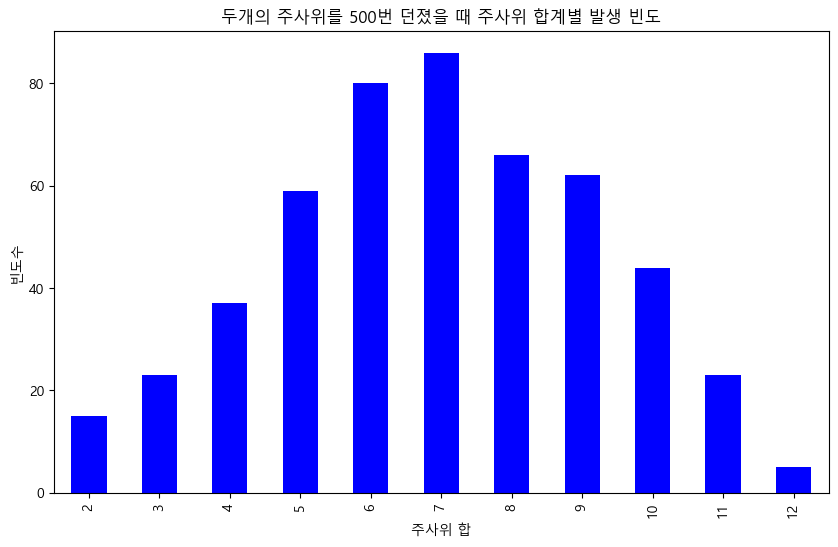

In [37]:
sort_freq.plot(kind='bar', color='blue', figsize=(10, 6))
plt.xlabel('주사위 합')
plt.ylabel('빈도수')
plt.title(f'두개의 주사위를 {trial}번 던졌을 때 주사위 합계별 발생 빈도')

## Relative Frequency (상대 빈도)

- 상대 빈도를 사용하여 다른 시도 횟수의 결과를 비교할 수 있도록 빈도를 재조정할 수 있습니다.

Text(0, 0.5, '상대 빈도')

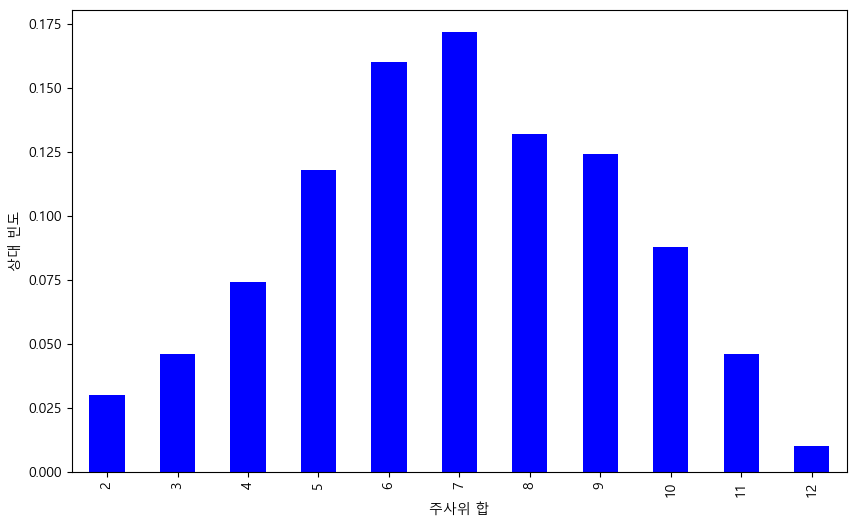

In [38]:
relative_freq = sort_freq / trial
relative_freq.plot(kind='bar', color='blue', figsize=(10, 6))
plt.xlabel('주사위 합')
plt.ylabel('상대 빈도')

## Distribution (분포)의 평균과 분산

$$mean (expectation) = \sum_{i}x_i p_i$$
$$variance = \sum_{i}(x_i - mean)^2 p_i$$

- 분포의 평균과 분산을 출력합니다. 평균과 분산을 사용하여 분포를 설명할 수 있습니다.

In [43]:
prob = freq / trial
prob

7     0.172
6     0.160
8     0.132
9     0.124
5     0.118
10    0.088
4     0.074
11    0.046
3     0.046
2     0.030
12    0.010
Name: 주사위합, dtype: float64

In [44]:
sum(prob)

1.0

## 평균

$$mean (expectation) = \sum_{i}x_i p_i$$

In [45]:
prob.index

Int64Index([7, 6, 8, 9, 5, 10, 4, 11, 3, 2, 12], dtype='int64')

In [46]:
prob.values

array([0.172, 0.16 , 0.132, 0.124, 0.118, 0.088, 0.074, 0.046, 0.046,
       0.03 , 0.01 ])

In [47]:
mean = sum(prob.index * prob.values)
mean

6.926

**평균 7 은 histogram 에서 나타난 평균 7 과 일치**

## 분산
- 기댓값 $\displaystyle \mu =\operatorname {E} [X]$$\displaystyle \mu =\operatorname {E} [X]$로부터 확률변수가 얼마나 떨어져있는지 그 정도를 제곱한 것의 기댓값
$$variance = \sum_{i}(x_i -\mu)^2 p_i$$

In [49]:
var = sum((prob.index - mean)**2 * prob.values)
var

5.184524

- 표준 편차 - 분산의 제곱근

In [50]:
std = np.sqrt(var)
std

2.276954984183921

- kde plot 시각화로 평균, 표준 편차 확인

커널 밀도 추정(KDE) 플롯은 데이터 집합의 확률 밀도 함수를 표시하는 데 사용되는 데이터 시각화의 한 유형입니다. 히스토그램과 유사하지만 데이터를 불연속 구간차원으로 나누는 대신 연속 함수를 사용하여 데이터의 분포를 추정합니다.

<AxesSubplot:ylabel='Density'>

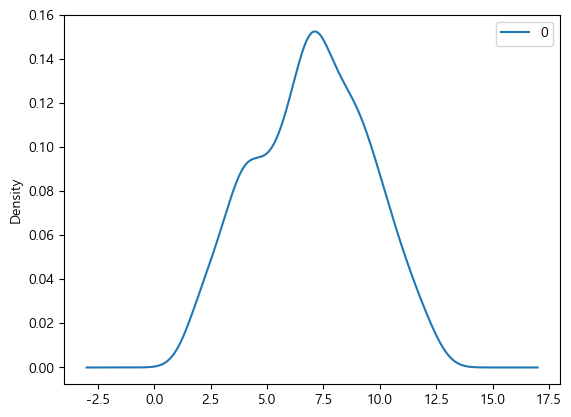

In [52]:
pd.DataFrame(results).plot(kind='kde')

계산한 평균, 표준 편차와 시각화 내용이 일치됨을 확인할 수 있습니다.

## 모집단, 표본집단, 신뢰구간

모집단(population), 표본집단(sample), 그리고 신뢰구간(confidence interval)은 통계학에서 중요한 개념입니다.

모집단은 조사 대상 전체를 의미하며, 모든 데이터를 포함합니다. 예를 들어, 전국 모든 학생들의 키를 조사하는 경우, 전국 모든 학생들이 모집단입니다.

표본집단은 모집단에서 추출한 일부 데이터를 의미합니다. 표본집단은 모집단을 대표할 수 있는 적절한 크기로 추출되어야 합니다. 예를 들어, 전국 모든 학생들 중에서 100명의 학생들의 키를 측정하여 통계적 분석을 진행하는 경우, 이 100명의 학생들이 표본집단입니다.

신뢰구간은 표본집단의 평균을 포함할 가능성이 높은 구간을 의미합니다. 즉, 신뢰구간은 모집단의 평균을 추정하는 데 사용됩니다. 예를 들어, 전국 모든 학생들의 키를 알고 싶은 경우, 전국 학생들 중에서 샘플링한 학생들의 키를 기반으로 신뢰구간을 계산하여 전국 모든 학생들의 키를 추정할 수 있습니다.

## 모집단

10개의 데이터로 모집단 DataFram을 만듭니다.

In [54]:
data = pd.DataFrame()
data['Population'] = [47, 48, 85, 20, 19, 13, 72, 16, 50, 60]
data

,Population
0,47
1,48
2,85
3,20
4,19
5,13
6,72
7,16
8,50
9,60


모집단에서 5개의 샘플을 복원추출법으로 뽑습니다.  

복원추출법(bootstrapping)은 통계학에서 자주 사용되는 표본추출 방법 중 하나입니다. 복원추출법은 표본추출시 무작위로 하나의 데이터를 추출한 후, 해당 데이터를 다시 모집단에 반환하고, 다음 데이터를 무작위로 추출하는 방법입니다.   
반면 비복원추출법(nonparametric sampling)은 한 번 추출한 데이터는 다시 추출되지 않는 방법을 말합니다. 즉, 추출된 각 데이터는 유일한 값이어야 합니다. 

In [55]:
sample_with_replacement = data['Population'].sample(5, replace=True)
print(sample_with_replacement)

6    72
2    85
2    85
0    47
3    20
Name: Population, dtype: int64


- 비복원 추출법

In [56]:
sample_without_replacement = data['Population'].sample(5, replace=False)
print(sample_without_replacement)

7    16
0    47
6    72
8    50
5    13
Name: Population, dtype: int64


## 모수와 통계치(Parameters and Statistics)

In [57]:
mu = data['Population'].mean()
std = data['Population'].std()  

print('모집단 평균 ', mu)
print('모집단 표준편차', std)

모집단 평균  43.0
모집단 표준편차 25.20581943387942
